<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/10-Sim_srag20_21-Gustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Especialização em Ciência de Dados aplicada a Políticas Públicas**
---
Disciplina: **D6 - Estatística Descritiva**

Professor: **Eduardo Monteiro de Castro Gomes**
**Relatório Final**
---
Aluno: **Gustavo de Queiroz Chaves**

**Bases utilizadas:**
---

**Banco de Dados de Síndrome Respiratória Aguda Grave - SRAG**

Exercícios de 2020 e 2021 
https://opendatasus.saude.gov.br/dataset/bd-srag-2020
https://opendatasus.saude.gov.br/dataset/bd-srag-2021

**Sistema de Informação sobre Mortalidade – SIM**

Exercícios de 2020 e 2021 
https://opendatasus.saude.gov.br/dataset/sistema-de-informacao-sobre-mortalidade

**Tabela com dados de Idh e de estimativa populacional para 2020 (IBGE)**

Organizada pela CGU com base em dados do IBGE e PNUD


**Justificativa para o trabalho**
---
O SIM, desenvolvido pelo Ministério da Saúde em 1975, é o produto da unificação de mais de quarenta modelos de instrumentos de Declaração de Óbito utilizados ao longo dos anos, para coletar dados sobre mortalidade no país. Seus registros vêm sendo utilizados para tomadas de decisão no âmbito da gestão de políticas públicas na área de saúde ao longo dos anos. Porém, sua sistemática que visa gerar confiabilidade impõe um processo de validação de seus dados envolvendo os diversos níveis das unidades federativas e com prazos respectivos tanto para alimentar o sistema quanto para validação, o que pode acarretar um tempo de até 12 meses para que se tenham os dados oficiais.

Considerada a dinâmica elevada que as doenças virais respiratórias transmissíveis acarretam o MS, por meio da Secretaria de Vigilância em Saúde (SVS), desenvolve a vigilância da Síndrome Respiratória Aguda Grave (SRAG) no Brasil, desde a pandemia de Influenza A(H1N1)pdm09 em 2009. Em 2020, o novo Coronavírus, foi incorporada na rede de vigilância da Influenza e outros vírus respiratórios. Atualmente, o sistema oficial para o registro dos casos e óbitos de SRAG é o Sistema de Informação da Vigilância Epidemiológica da Gripe (SIVEP-Gripe), com os dados de 2021 sendo Os dados de 2021 passaram a ser disponibilizados semanalmente, às quartas-feiras.

O presente trabalho buscou realizar análises comparativas temporais e geográficas (nível de entes) entre os registros de mortes com indicativo de causa associada à Covid-19 nos dois bancos de dados SRAG e SIM, considerando este último como sendo o mais confiável. Certamente, a disponibilidade de informações mais tempestivas se fazem necessárias para sua utilidade no processo decisório, por isso deseja-se com este trabalho utilizando técnicas de estatística descritiva estimar faixas de erro entre os registros nos sistemas, visando reduzir a assimetria quanto ao nível de imprecisão das medidas pelo SRAG,sem que se pretenda estimar sub-registros ou excessos de registros de mortes decorrentes da pandemia ou outras análises.


#Realiza a importação de bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
%load_ext google.colab.data_table

#Realiza o carregamento de dados do SRAG e do SIM (2020 e 2021)

##Cria função para formatação de campos no formato de data

In [ ]:
def date_parser(d):
    try:
      d = datetime.datetime.strptime(str(d),"%Y-%m-%d")
    except ValueError:
      try:
        d = datetime.datetime.strptime(str(d),"%d%m%Y")
      except Exception:
        try:
          d = datetime.datetime.strptime(str(d),"%d/%m/%Y")
        except:
          d = pd.NaT
    return d

## Especificas os campos que serão carregados do SRAG e SIM

*Variáveis qualitativas nominais:*

'CODMUNNATU','CODMUNOCOR','CODESTAB','CB_PRE','CIRCOBITO','ALTCAUSA','CAUSABAS_O','ATESTADO','TPPOS','LINHAA','LINHAB','LINHAC','LINHAD','LINHAII'

*Variáveis qualitativas ordinais:*

'DTNASC','DTOBITO','DTRECEBIM'

In [ ]:
cols_sim=['DTNASC','CODMUNNATU','CODMUNRES','DTOBITO','SEXO','RACACOR','ESTCIV','CODMUNOCOR','CIRCOBITO','ALTCAUSA','CAUSABAS_O','DTRECEBIM','ATESTADO','TPPOS']

*Variáveis qualitativas nominais:*

'SG_UF_NOT','CO_MUN_NOT','CO_MU_INTE','TOMO_RES','CLASSI_FIN','CRITERIO','EVOLUCAO','PCR_SARS2'

*Variáveis qualitativas ordinais:*

'DT_NASC','DT_INTERNA','DT_EVOLUCA','DT_RES','DT_DIGITA','DT_NOTIFIC'

In [ ]:
cols_srag=['SG_UF_NOT','CO_MUN_NOT','CO_MUN_RES','DT_NOTIFIC','DT_NASC','DT_INTERNA','CO_MU_INTE','TOMO_RES','CLASSI_FIN','CRITERIO','DT_EVOLUCA','EVOLUCAO','PCR_SARS2','DT_RES','DT_DIGITA']

## Carrega para dataframes os registros do SIM e SRAG

###SIM 2020 e 2021

In [ ]:
sim2021=pd.read_csv("https://opendatasus.saude.gov.br/dataset/57c4b23e-6ffa-43ef-a1e7-23103f73f376/resource/da17c5f6-aa89-4e7d-b7e2-ec4b77a5dc31/download/do2021opendata.csv",usecols=cols_sim,sep=";",parse_dates=['DTNASC','DTOBITO','DTRECEBIM'],date_parser=date_parser, encoding="ISO-8859-1")

In [ ]:
sim2020=pd.read_csv("https://opendatasus.saude.gov.br/dataset/57c4b23e-6ffa-43ef-a1e7-23103f73f376/resource/8d947ac1-addb-49f2-85ab-824a7408a432/download/dobrano_opendatasus.csv",usecols=cols_sim,sep=";",parse_dates=['DTNASC','DTOBITO','DTRECEBIM'],date_parser=date_parser, encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sim=pd.concat([sim2020,sim2021],ignore_index=True,join='outer')

Calcula a quantidade de registros com o campo 'DTOBITO' sem data em relação ao total da base

In [ ]:
sim['DTOBITO'].isnull().sum()/sim['DTOBITO'].count()

0.0

In [ ]:
sim.set_index(['DTOBITO'],inplace=True)

###SRAG 2020 e 2021

In [ ]:
srag2021=pd.read_csv("https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-09-08-2021.csv",sep=";",usecols=cols_srag,parse_dates=['DT_NASC','DT_INTERNA','DT_NOTIFIC','DT_EVOLUCA','DT_RES','DT_DIGITA'],date_parser=date_parser,encoding="ISO-8859-1")

In [ ]:
srag2020=pd.read_csv("https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-09-08-2021.csv",sep=";",usecols=cols_srag,parse_dates=['DT_NASC','DT_INTERNA','DT_NOTIFIC','DT_EVOLUCA','DT_RES','DT_DIGITA'],date_parser=date_parser,encoding="ISO-8859-1")

In [ ]:
srag=pd.concat([srag2020,srag2021],ignore_index=True,join='outer')

Calcula a quantidade de registros com o campo 'DT_EVOLUCA' sem data em relação ao total da base SRAG

In [ ]:
srag['DT_EVOLUCA'].isnull().sum()/srag['DT_EVOLUCA'].count()

0.2804686854524742

Devido ao elevado número de registros sem data, buscou-se identificar a quantidade relativa sem data dentre os registros que tiveram desfecho por morte ('EVOLUCAO' ==2.0|3.0) para se definir a estratégia a ser adotada. 

Visualiza-se a possibilidade de exclusão desses registros ou a substituição da data de óbito pela melhor opção disponível, que seria a data em que o registro foi feito no sistema SRAG, disponível no campo 'DT_DIGITA'

In [ ]:
((srag['EVOLUCAO'].isin([2.0,3.0])) & (srag['DT_EVOLUCA'].isna())).sum()/srag['DT_EVOLUCA'].count()

0.0013629933778150545

Considerando as duas estratégias alternativas, estima-se abaixo a máxima e mínima diferença entre as datas 'DT_EVOLUCA' e 'DT_DIGITA

In [ ]:
srag['dif']=abs((srag['DT_EVOLUCA']-srag['DT_DIGITA']).dt.days)

In [ ]:
srag['dif'].describe()

count    1.997075e+06
mean     1.524391e+01
std      2.898491e+01
min      0.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.500000e+01
max      5.070000e+02
Name: dif, dtype: float64

***Achado Preliminar:*** Considerando que a diferença de datas entre a data de óbito e a data de registro em sistema possui os três quartis com valores menores que 15 dias, será adotada a estratégia de substituir a data de registro no sistema nas datas de óbito não disponíveis

In [ ]:
srag['data']=srag['DT_EVOLUCA']

In [ ]:
srag['data'].fillna(srag['DT_DIGITA'],inplace=True)

In [ ]:
srag.set_index(srag['data'],inplace=True)

In [ ]:
srag.drop(columns=['data'],inplace=True)

##Remove registros com indícios de serem duplicados nas bases

Informa abaixo a quantidade de registros removidos da SRAG com indícios de serem duplicados

In [ ]:
srag.duplicated().sum()

598

In [ ]:
srag.drop_duplicates(inplace=True)

Informa abaixo a quantidade de registros removidos do SIM com indícios de serem duplicados

In [ ]:
sim.duplicated().sum()

2621

In [ ]:
sim.drop_duplicates(inplace=True)

***Achado Preliminar:*** Há fortes indícios de registros duplicados nas duas bases utilizadas, tendo sido identificados um total de 598 registros duplicados no SRAG e 2621 no SIM. Para fins de análises posteriores, os registros identificados como duplicados foram eliminados.   

##Cria um Dataframe de dados de desfecho por morte com indicativo de COVID em 2020 e 2021

### Dataframe oriundo do SRAG

***Achado Preliminar:*** Abaixo identificou-se um percentual de registros com "mortes" no SRAG sem data de morte registrado. Embora não se espere que a base não contenha esse campo preenchido, o percentual é bem reduzido.

In [ ]:
srag.loc[(srag['EVOLUCAO'].isin([2.0,3.0])) & (srag['DT_EVOLUCA'].isna())]['CO_MUN_NOT'].count()/srag['CO_MUN_NOT'].count()

0.0010646977971472983

Critérios que associam o desfecho à Covid em 2020 e 2021

In [ ]:
cs1=srag['EVOLUCAO'].isin([2.0,3.0])
cs2=srag['CLASSI_FIN']==5.0

In [ ]:
srag_covid=srag.loc[cs1 & cs2]

**Abaixo a quantidade total de registros com "mortes" no SRAG em 2020 e 2021 com associação com Covid-19**

In [ ]:
srag_covid['CO_MUN_NOT'].count()

539355

In [ ]:
srag_covid_mes=srag_covid.groupby(['SG_UF_NOT'])['DT_DIGITA'].resample('M').count()

Observa-se que o SRAG traz registros incluindo apenas até o **mês de agosto de 2021**

In [ ]:
srag_covid.loc['2021','DT_EVOLUCA'].max()

Timestamp('2021-08-08 00:00:00')

Informa abaixo a quantidade de mortes por Covid-19 por UF nos anos de 2020 e 2021

In [ ]:
srag_covid.groupby(['SG_UF_NOT'])['DT_DIGITA'].resample("Y").count()

SG_UF_NOT  data      
AC         2020-12-31      644
           2021-12-31      957
AL         2020-12-31     2779
           2021-12-31     3076
AM         2020-12-31     5715
           2021-12-31     8258
AP         2020-12-31      740
           2021-12-31      854
BA         2020-12-31     8898
           2021-12-31    12458
CE         2020-12-31    10741
           2021-12-31    13484
DF         2020-12-31     4577
           2021-12-31     5624
ES         2020-12-31     3750
           2021-12-31     2951
GO         2020-12-31     7269
           2021-12-31    13660
MA         2020-12-31     3495
           2021-12-31     4216
MG         2020-12-31    13285
           2021-12-31    38632
MS         2020-12-31     2401
           2021-12-31     6637
MT         2020-12-31     2635
           2021-12-31     4028
PA         2020-12-31     7850
           2021-12-31     8717
PB         2020-12-31     3730
           2021-12-31     5330
PE         2020-12-31    11101
           2021-1

Informa abaixo a quantidade de mortes por Covid-19 nos anos, contabilizados *até agosto* de 2021, por Município

In [ ]:
srag_covid.groupby(['SG_UF_NOT','CO_MUN_NOT'])['CO_MUN_NOT'].count()

SG_UF_NOT  CO_MUN_NOT
AC         120001          15
           120010           1
           120020         114
           120040        1471
AL         270010           2
                         ... 
TO         172090           3
           172100        1236
           172120          26
           172208           1
           172210          10
Name: CO_MUN_NOT, Length: 3139, dtype: int64

###Cria o Dataframe srag_explor para posterior união com outros para fins de análise exploratória

Considerando que o os dados não estão completos em maio de 2021 no SIM, será utilizado para fins de comparação entre as bases como corte os dados **até o mês de abril de 2021**

In [ ]:
srag_explor=srag_covid.loc['2020-01-01' : '2021-04-30'].groupby(['SG_UF_NOT','CO_MUN_NOT'])['DT_DIGITA'].resample("D").count()

In [ ]:
srag_explor=pd.DataFrame(srag_explor.reset_index())

In [ ]:
srag_explor.rename(columns={'DT_DIGITA':'srag_mortes'}, inplace=True)

Remove os registros criados pelo resample("D") com data de digitação 'srag_mortes' diferente do 'DT_EVOLUCA'(utilizado no índice). Visa excluir os registros criados no novo DataFrame sem número de morte.

In [ ]:
srag_explor=srag_explor[srag_explor['srag_mortes']!=0]

Abaixo o total de mortes acumuladas e registradas no SRAG associadas à **COVID**-19 até o mês de abril de 2021

In [ ]:
srag_explor['srag_mortes'].sum()

417451

### Dataframe oriundo do SIM

TOMO_RES=1
PCR_SARS2=1
RES_SOR=1
DT_RES
DT_DIGITA

LINHAA	LINHAB	LINHAC	LINHAD LINHAII CAUSABAS_O ATESTADO ==
CID10 U071(COVID -19, vírus identificado) U072 (COVID -19, vírus identificado, diagn. clínico) B342(Infecção por coronavírus de localização não especificada), J960(Insuficiência respiratória aguda)

Critérios que associam o desfecho à Covid em 2021

In [ ]:
sc1=sim['ATESTADO'].astype(str).str.contains("U071")
sc2=sim['ATESTADO'].astype(str).str.contains("U072")
sc3=sim['ATESTADO'].astype(str).str.contains("B342")

In [ ]:
sim_covid=sim.loc[sc1|sc2|sc3]

In [ ]:
sim_covid=sim_covid[['DTNASC','CODMUNOCOR','DTRECEBIM','ATESTADO']]

In [ ]:
mortes_covid_confirmadas_sim=sim.loc[sc1]['DTRECEBIM'].count()/sim_covid['DTRECEBIM'].count()

Informa abaixo o percentual do total de mortes por Covid confirmadas por algum exame "vírus identificado" para Covid-19

In [ ]:
mortes_covid_confirmadas_sim

0.8022293805996934

**Abaixo a quantidade de registros com "mortes" no SIM em 2020 e 2021 com associação com Covid-19 (confirmação por exame laboratorial ou clínico)**

In [ ]:
sim_covid['DTRECEBIM'].count()

442993

Observa-se que o SIM traz registros incluindo até o **mês de maio de 2021**

In [ ]:
sim_covid.loc['2021'].max()

CODMUNOCOR                      530010
DTRECEBIM          2021-05-12 00:00:00
ATESTADO      Y960/B342 U071*C859 N179
dtype: object

Informa abaixo a quantidade de mortes por Covid-19 nos anos, contabilizados *até 12 de maio de 2021*, por Município

In [ ]:
sim_covid.groupby('CODMUNOCOR')['DTRECEBIM'].resample("Y").count()

CODMUNOCOR  DTOBITO   
110001      2020-12-31       3
            2021-12-31      21
110002      2020-12-31     153
            2021-12-31     374
110003      2020-12-31       3
                          ... 
522200      2021-12-31       5
522205      2021-12-31       4
522220      2021-12-31       2
530010      2020-12-31    4350
            2021-12-31    2625
Name: DTRECEBIM, Length: 6185, dtype: int64

###Cria o dataframe sim_explor para posterior união com outros para fins de análise exploratória

Considerando que o os dados não estão completos em maio de 2021, será utilizado para fins de comparação entre as bases como corte os dados até o mês de abril de 2021

In [ ]:
sim_explor=sim_covid.loc['2020-01-01' : '2021-04-30'].groupby('CODMUNOCOR')['DTRECEBIM'].resample('D').count()

In [ ]:
sim_explor=sim_explor.reset_index()

In [ ]:
sim_explor=pd.DataFrame(sim_explor)

In [ ]:
sim_explor.rename(columns={'DTRECEBIM':'sim_mortes'},inplace=True)

Remove os registros criados pelo resample("D") com data de digitação (DTRECEBIM) diferentes do DTOBITO usado no índice e criados no groupby

In [ ]:
sim_explor=sim_explor[sim_explor['sim_mortes']!=0]

In [ ]:
sim_explor.reset_index(inplace=True)

Abaixo o total de mortes acumuladas e registradas no SIM associadas à COVID-19 até o mês de abril de 2021

In [ ]:
sim_explor['sim_mortes'].sum()

434522

In [ ]:
'Considerando o corte temporal no mês de abril de 2021 para ambas as bases,identificou-se \
um total de mortes por Covid-19 acumulado de {} pelo SRAG e \
um total de {} pelo SIM'.format( srag_explor['srag_mortes'].sum(),sim_explor['sim_mortes'].sum())

'Considerando o corte temporal no mês de abril de 2021 para ambas as bases,identificou-se um total de mortes por Covid-19 acumulado de 417451 pelo SRAG e um total de 434522 pelo SIM'

##Importa tabela com o IdH e o tamanho populacional para posterior união para análise exploratória

In [ ]:
mun_idh_pop=pd.read_csv('/content/entes_ibge_idhm_pop.csv',decimal=',',sep=';',usecols=['COD_IBGE','SIGLA_UF','NOME_ENTE','LAT','LNG','POP_EST_2020','REGIAO','IDHM'],encoding='ISO-8859-1')

In [ ]:
mun_idh_pop['IDHM']=mun_idh_pop['IDHM'].round(4)

In [ ]:
mun_idh_pop['COD_IBGE']=mun_idh_pop['COD_IBGE'].astype('str').str[:6]

# Cria Dataframes da variação de mensurações por nível de Estado e Município, adicionando o respectivo IDH e tamanho estimado da população para 2020

Primeiramente agrupa-se os registros do SRAG com SIM com períodos coincidentes

In [ ]:
sim_srag=pd.merge(srag_explor,sim_explor[['CODMUNOCOR','DTOBITO','sim_mortes']],left_on=['CO_MUN_NOT','data'],right_on=['CODMUNOCOR','DTOBITO'],how='outer')

##Considerando a necessidade de usar o "outer" na operação de merge, necessita-se complementar os 'CODMUNOCOR' e 'CO_MUN_NOT' dos registros não coincidadentes nos dois dataframes originais

In [ ]:
sim_srag['CODMUNOCOR'].fillna(sim_srag['CO_MUN_NOT'],inplace=True)

In [ ]:
sim_srag['CO_MUN_NOT'].fillna(sim_srag['CODMUNOCOR'],inplace=True)

In [ ]:
(sim_srag['CO_MUN_NOT']==sim_srag['CODMUNOCOR']).value_counts()

True    155737
dtype: int64

In [ ]:
sim_srag=sim_srag.astype({'CO_MUN_NOT':'str','CODMUNOCOR':'str'})

In [ ]:
sim_srag['CO_MUN_NOT']=sim_srag['CO_MUN_NOT'].str[:6]
sim_srag['CODMUNOCOR']=sim_srag['CODMUNOCOR'].str[:6]

Verifica-se abaixo a quantidade de registros sem coincidência de datas com registros de morte nas duas bases SRAG e SIM gerados pela criação do DataFrame com o parâmetro 'outer'. Observa-se que há um total de 52571 registros com dados em apenas uma das bases.

In [ ]:
(sim_srag['data'].isna()|sim_srag['DTOBITO'].isna()).value_counts()

False    103166
True      52571
dtype: int64

##Acrescentam-se dois campos de variáveis quantitativas: 'match' com a diferença entre o total de registros de mortes registradas no SIM e SRAG e o campo '(SIM-SRAG)/SIM'que relativiza essa diferença em relação ao registrado no SIM.  

Variáveis criadas pela manipulação dos registros das bases utilizadas
match - variável quantitativa discreta
'(SIM-SRAG)/SIM' - variável quantitativa contínua

In [ ]:
sim_srag['match']=sim_srag['sim_mortes'].fillna(0)-sim_srag['srag_mortes'].fillna(0)

Será criado um campo datetime com as datas oriundas das bases para criar um Datetime DataFrame. Para isso, realiza-se a complementação nos campos 'data' sem preenchimento com a informação do DTOBITO' para os registros que existiam apenas no SIM para a criação do campo 'data_idx' que será utilizado como índice

In [ ]:
sim_srag['data_idx']=sim_srag['data'].fillna(sim_srag['DTOBITO'])

***Achado Preliminar:*** Do conjunto união de registros nos sistemas SIM e SRAG, identificou-se o índice abaixo de registros de mortes diárias nos dois sistemas exatamente em conformidade e com tolerência de até 2 mortes de diferenças entre eles.

In [ ]:
(sim_srag['match']==0).mean()

0.43884882847364465

In [ ]:
(abs(sim_srag['match'])<3.0).mean()

0.9449392244617528

In [ ]:
sim_srag.set_index(['data_idx'],inplace=True)

## Cria DataFrame com informações de UFs de nível estadual com Idhm e Estimativa Populacional (ano de 2020)

Cria-se um subconjunto somente com dados das UFs no nível Estadual

In [ ]:
mun_idh_pop_estados=mun_idh_pop[mun_idh_pop['COD_IBGE'].str[2:]=='0000']

Abaixo, busca-se criar um campo com a sigla da UF em todos os registros, uma vez que o DataFrame possuía diversos registros sem essa informação

In [ ]:
sim_srag['Cod_UF']=sim_srag['CO_MUN_NOT'].str[:2]+'0000'

In [ ]:
dados_anuais=sim_srag.loc['2020':'2021'].groupby(['Cod_UF']).resample("Y").sum()
dados_anuais['(SIM-SRAG)/SIM']=(dados_anuais['sim_mortes']-dados_anuais['srag_mortes'])/(dados_anuais['sim_mortes'])
dados_anuais['(SIM-SRAG)/SIM']=dados_anuais['(SIM-SRAG)/SIM'].round(3)
dados_anuais.reset_index(inplace=True)

In [ ]:
dados_anuais=pd.merge(dados_anuais,mun_idh_pop_estados[['IDHM','POP_EST_2020','COD_IBGE','SIGLA_UF']],left_on='Cod_UF',right_on='COD_IBGE')

In [ ]:
dados_anuais.sort_values('SIGLA_UF',inplace=True)

## Cria DataFrame com informações de UFs de nível municipal com Idhm e Estimativa Populacional (ano de 2020)

In [ ]:
dados_mensais=sim_srag.loc['2020':'2021'].groupby(['CO_MUN_NOT']).resample("M").sum()

In [ ]:
dados_mensais['(SIM-SRAG)/SIM']=np.where(dados_mensais['sim_mortes']==0, float('Nan'),dados_mensais['match']/dados_mensais['sim_mortes'])

In [ ]:
dados_mensais['(SIM-SRAG)/SIM']=dados_mensais['(SIM-SRAG)/SIM'].round(3)

In [ ]:
dados_mensais.reset_index(inplace=True)

**Remove os registros criados pelo resample("M") com sim_mortes e srag_mortes nulos.**

In [ ]:
dados_mensais=dados_mensais[(dados_mensais['srag_mortes']!=0)|(dados_mensais['sim_mortes']!=0)]

**Identifica-se 3215 registros nos quais o campo criado (SIM-SRAG)/SIM não pode ser calculado**

In [ ]:
dados_mensais[(dados_mensais['srag_mortes']!=0) & (dados_mensais['sim_mortes']==0)]['CO_MUN_NOT'].count()

3215

In [ ]:
dados_mensais[(dados_mensais['srag_mortes']!=0) & (dados_mensais['sim_mortes']==0)]['CO_MUN_NOT'].count()/dados_mensais['CO_MUN_NOT'].count()

0.14323902873691247

Essa limitação corresponde a 0,14 de toda a população de dados disponíveis, e como alternativa para análise se utilizará a média dos demais dados disponíveis para o município. Considerando que o percentual pode estar concentrado em alguns municípios, precisa-se identificar essa concentração de forma a melhor tratar o limitação, eventualmente eliminando-os.

In [ ]:
dados_mensais['cont_indef']=((dados_mensais['srag_mortes']!=0) & (dados_mensais['sim_mortes']==0))

In [ ]:
lista_exclusao=dados_mensais.groupby('CO_MUN_NOT')['cont_indef'].mean().sort_values(ascending=False).reset_index()

Identifica-se 605 municípios que tiveram mais de 50% da variável ('SIM-SRAG/SIM') como valor indefinido para fins de exclusão da população analisada, o que corresponde a 15,3% do total da população.

In [ ]:
lista_exclusao[lista_exclusao['cont_indef']>=0.50]['cont_indef'].count()

605

In [ ]:
lista_exclusao[lista_exclusao['cont_indef']>=0.50]['cont_indef'].count()/lista_exclusao['cont_indef'].count()

0.15382659547419272

In [ ]:
lista_exclusao=lista_exclusao[lista_exclusao['cont_indef']>=0.50]

In [ ]:
dados_mensais=dados_mensais[~dados_mensais['CO_MUN_NOT'].isin(lista_exclusao['CO_MUN_NOT'])]

In [ ]:
dados_mensais.groupby('CO_MUN_NOT')['(SIM-SRAG)/SIM'].mean()

CO_MUN_NOT
110001    0.057167
110002    0.044167
110003    1.000000
110004    0.230077
110005    0.428600
            ...   
522185   -0.387000
522200    0.250000
522205    1.000000
522220    1.000000
530010   -0.024667
Name: (SIM-SRAG)/SIM, Length: 3328, dtype: float64

In [ ]:
dados_mensais['(SIM-SRAG)/SIM'] = dados_mensais.groupby("CO_MUN_NOT")['(SIM-SRAG)/SIM'].transform(lambda x: x.fillna(x.mean()))

Acrescenta-se ao dataframe as informações do Idhm e de estimativa populacional

In [ ]:
dados_mensais=pd.merge(dados_mensais,mun_idh_pop[['IDHM','POP_EST_2020','COD_IBGE','SIGLA_UF']],left_on='CO_MUN_NOT',right_on='COD_IBGE')

In [ ]:
dados_mensais.sort_values(['SIGLA_UF'],ascending=True,inplace=True)

#Análises exploratórias sobre os dados

##Análises sobre os dados agregados no nível estadual das UFs

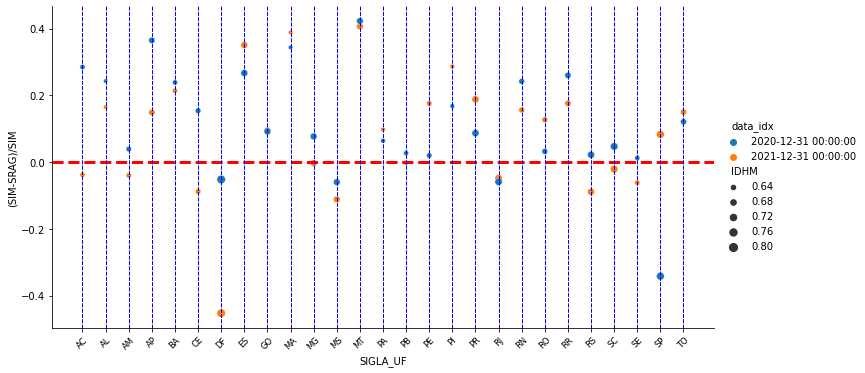

In [ ]:
sns.relplot(x='SIGLA_UF', y=(dados_anuais['(SIM-SRAG)/SIM']),data=dados_anuais,hue='data_idx',size='IDHM',aspect=2)
plt.xticks(
    rotation=45, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='small')
plt.axhline(0.0, ls='--', linewidth=3, color='red')
for i in dados_anuais['SIGLA_UF']:
  plt.axvline(x=i,ls='--', linewidth=1, color='blue')
plt.show()

***Achado Preliminar:*** Observa-se que na grande maioria as UFs tiveram uma tendência de total de registros de mortes associados à COVID-19 no SIM superiores aos realizados no SRAG. 

***Achado Preliminar:*** É possível verificar que as UFs do BA,GO,MT, PA, RJ e TO tiveram pequenas variações de tendência de 'erro" entre os anos observados. De outra forma, as UFs do AC, AP, CE, DF e SP destacam-se com grande variabilidade no comportamento na comparação ano a ano. 

***Achado Preliminar:*** Considerando que a pandemia iniciou-se no país em 2020, seria razoável supor que tendências de aprimoramento dos sistemas de vigilância e de registros associados pudessem ser aprimorados para 2021 , reduzindo discrepâncias ou pelo menos mantendo-se aproximadamente nos mesmos níveis do ano anterior. Porém, visualmente percebe-se que o DF se comportou de forma oposta às expectativas, tendo a diferença entre os registros acumulados no ano de 2021 não apenas se diferenciado do padrão de 2020 como também se afastado da diferença nula.

###Procura-se testar se há correlação entre as variações relativas entre bases verificadas com o Idhm ou tamanho de população estimada no ano de 2020

In [ ]:
dadosano_2020=dados_anuais[dados_anuais['data_idx']<'2021-01-01']

In [ ]:
scipy.stats.pearsonr(dadosano_2020['(SIM-SRAG)/SIM'], dadosano_2020['IDHM'])

(-0.4521509463470566, 0.017891650912779732)

In [ ]:
scipy.stats.pearsonr(dadosano_2020['(SIM-SRAG)/SIM'], dadosano_2020['POP_EST_2020'])

(-0.594381766346041, 0.0010779758551333353)

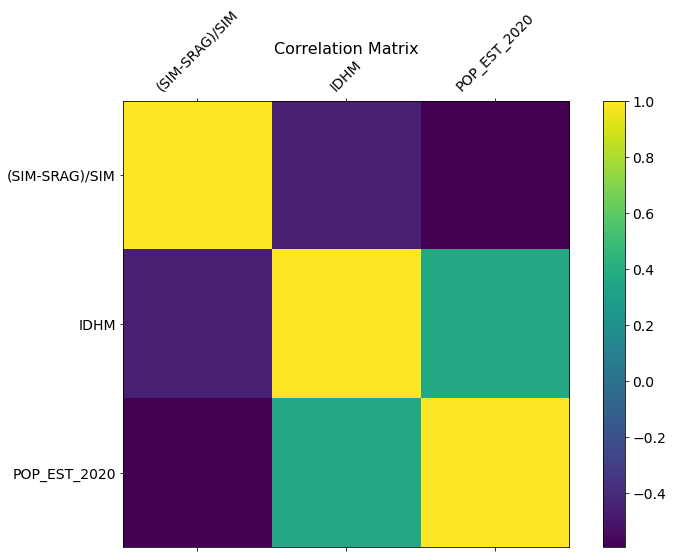

In [ ]:
f = plt.figure(figsize=(12, 8))
plt.matshow(dadosano_2020[['SIGLA_UF','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].corr(), fignum=f.number)
plt.xticks(range(dadosano_2020[['SIGLA_UF','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).shape[1]), dadosano_2020[['SIGLA_UF','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dadosano_2020[['SIGLA_UF','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).shape[1]), dadosano_2020[['SIGLA_UF','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16,pad=25);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


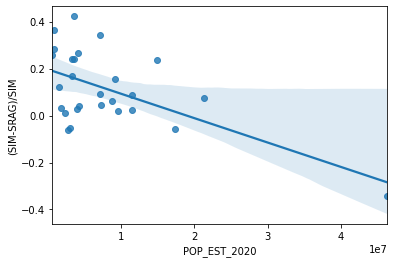

In [ ]:
sns.regplot(dadosano_2020['POP_EST_2020'], dadosano_2020['(SIM-SRAG)/SIM'])

***Achado Preliminar:***Não se evidenciou que haja correlação entre a variável quantitativa (SIM-SRAG)/SIM e o IDHM, por outro lado o teste apontou grau de correlação negativa com a variável 'POP_EST_2020'de forma agregada por UFs no nível estadual, verificado também pelo gráfico com a regressão linear de forma a complementar a análise.

##Análises sobre os dados no nível de Municípios

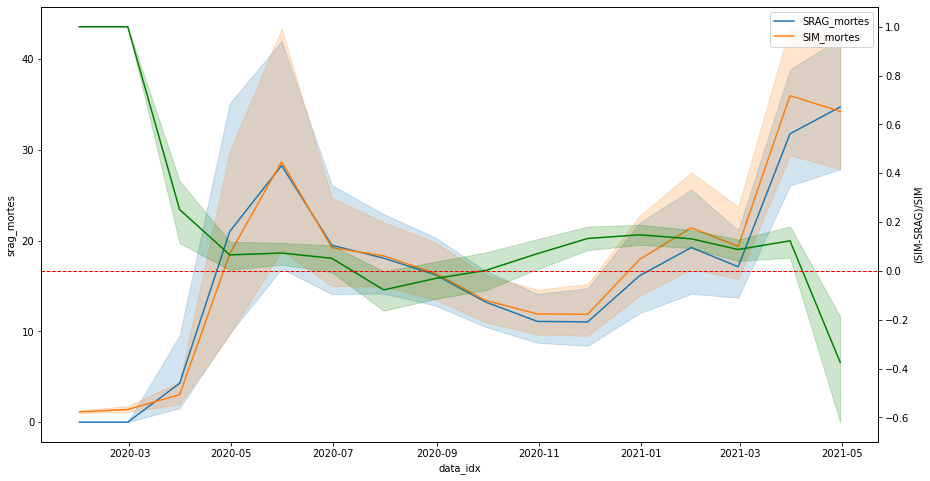

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data=dados_mensais, x="data_idx", y='srag_mortes',label='SRAG_mortes')
sns.lineplot(data=dados_mensais, x="data_idx", y='sim_mortes',label='SIM_mortes')
ax2 = plt.twinx()
ax=sns.lineplot(data=dados_mensais, x='data_idx', y='(SIM-SRAG)/SIM',ax=ax2,color='g')
ax.axhline(0.0, ls='--', linewidth=1, color='red')
plt.show()

***Achado Preliminar:*** Observa-se que a diferença relativa (SIM-SRAG/SIM) de registros foi alta e positiva no período anterior à pandemia no país (possivelmente por sub-registros no SRAG). Porém, provavelmente com o crescimento de importância do SRAG com a pandemia, essa variável foi sendo reduzida e se manteve positiva (isto é, com o SIM em valores superiores ao SRAG) por quase todo o período temporal de análise. 

***Achado Preliminar:*** Embora as dispersões nos valores de registros de mortes no SRAG e SIM tenham sido maiores no início de 2020 (possivelmente pelo ineditismo e aprendizado), não se observa que  a diferença relativa (SIM-SRAG/SIM) tenha sido proporcionalmente tão mais elevada do que no restante dos períodos até ABRL.2021. 

***Achado Preliminar:*** Observa-se uma mudança de comportamento para os dados a partir de MAI.2021, que foi o último mês utilizado na análise. Considerando que eram os dados mensais mais novos disponibilizados pelo SIM de 2021 com status de "prévio" é possível que o mesmo venha ainda sofrer ajustes e portanto seria prematuro buscar uma explciação.

Abaixo, são apresentados os gráficos individuais por UF da evolução mensal da variação relativa de registos entre as bases ((SIM-SRAG)/SIM') ao longo dos meses de 2020 e 2021.

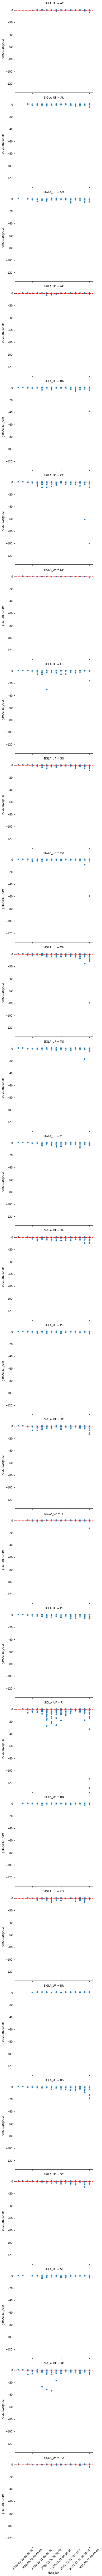

In [ ]:
g=sns.relplot(x='data_idx', y='(SIM-SRAG)/SIM', data=dados_mensais,row='SIGLA_UF')
axes = g.axes.flatten()
for ax in axes:
  ax.axhline(0.0, ls='--', linewidth=1, color='red')
  ax.set_xticklabels(dados_mensais['data_idx'], rotation = 45)


***Achado Preliminar:*** Os Estados de PE, AL, MG, RJ e MT se destacam pela  maior variabilidade na variável (SIM-SRAG)/SIM pelos seus municípios componentes que outras unidades. No gráfico de diagrama de caixa a seguir também é possível confirmar essa observação.


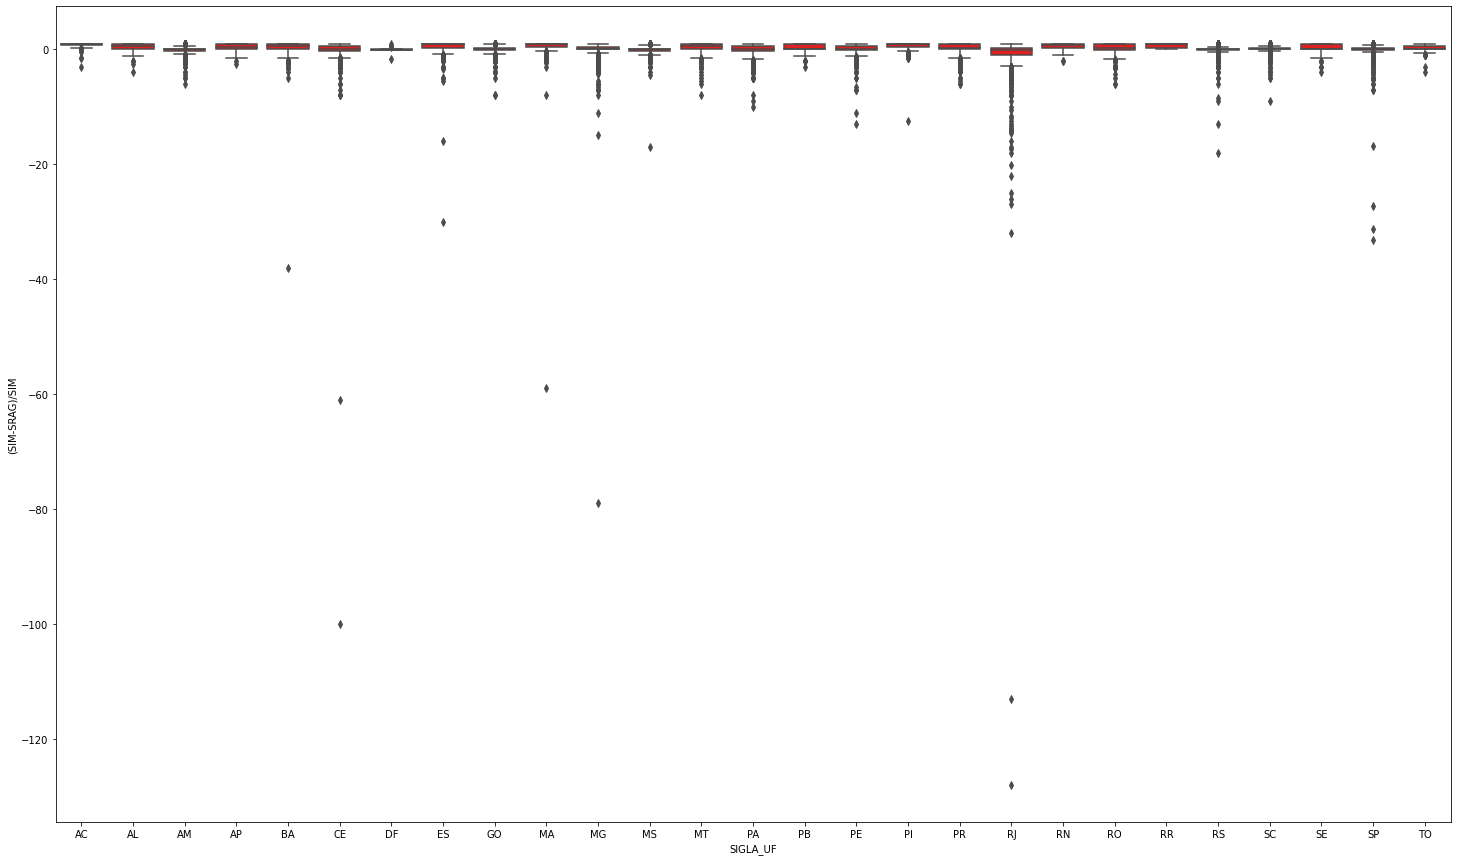

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(
    data=dados_mensais,
    x='SIGLA_UF',
    y='(SIM-SRAG)/SIM',
    color='red')

***Achado Preliminar:*** O gráfico complementa os gráficos anteriores, permitindo visualizar claramente as UFs com maior quantidade de outliers e dispersão dos valores de '(SIM-SRAG)/SIM' dentro da UF, destacando-se a UF do RJ

In [ ]:
dados_mensais[dados_mensais['SIGLA_UF']=='RJ']['(SIM-SRAG)/SIM'].describe()

count    815.000000
mean      -1.308179
std        6.775335
min     -128.000000
25%       -1.000000
50%       -0.062000
75%        0.301500
max        1.000000
Name: (SIM-SRAG)/SIM, dtype: float64

Para a realização do teste de correlação, identificou-se que o Município de Balneário Rincão, em Santa Catarina, não possui IDHM conhecido devido sua criação remontar a Jan.2013 e, para fins de realização dos testes de correlação, será excluído.

In [ ]:
dados_mensais[dados_mensais['IDHM'].isna()]

,CO_MUN_NOT,data_idx,srag_mortes,sim_mortes,match,(SIM-SRAG)/SIM,cont_indef,IDHM,POP_EST_2020,COD_IBGE,SIGLA_UF
16990,422000,2021-03-31,0.0,1.0,1.0,1.0,False,NaN,12946,422000,SC
16989,422000,2020-09-30,0.0,1.0,1.0,1.0,False,NaN,12946,422000,SC


In [ ]:
dados_mensais.drop([16990,16989],inplace=True)

In [ ]:
scipy.stats.pearsonr(dados_mensais['(SIM-SRAG)/SIM'], dados_mensais['IDHM'])

(-0.07483986131247089, 2.6377048081870326e-26)

In [ ]:
scipy.stats.pearsonr(dados_mensais['(SIM-SRAG)/SIM'], dados_mensais['POP_EST_2020'])

(-0.09301350764168098, 8.970584068056755e-40)

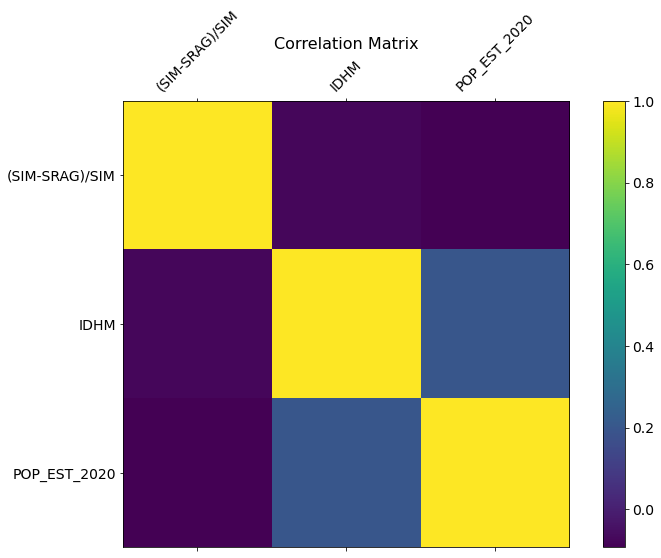

In [ ]:
f = plt.figure(figsize=(12, 8))
plt.matshow(dados_mensais[['CO_MUN_NOT','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].corr(), fignum=f.number)
plt.xticks(range(dados_mensais[['CO_MUN_NOT','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).shape[1]), dados_mensais[['CO_MUN_NOT','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dados_mensais[['CO_MUN_NOT','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).shape[1]), dados_mensais[['CO_MUN_NOT','(SIM-SRAG)/SIM','IDHM','POP_EST_2020']].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16,pad=30);

***Achado Preliminar:*** A análise não evidenciou correlação entre as variáveis no nível de UFs municipais no nível mensal.